# isoP2P0 Finite Elements for Stokes Equations

This example is to show the convergence of isoP2-P0 finite elements for the Stokes equation on the unit square:

$$- \Delta u + {\rm grad}\, p  = f \quad {\rm div}\, u    = 0  \quad  \text{ in } \quad \Omega,$$

with the pure Dirichlet boundary condition. The solver is based on a DGS type smoother. 

**References**:
- [Finite Element Methods For Stokes Equations](http://www.math.uci.edu/~chenlong/226/FEMStokes.pdf)
- [Project: Finite Element Methods for Stokes Equations](../project/projectFEM.html)

**Subroutines**:

    - StokesisoP2P0
    - squareStokes
    - femStokes
    - Stokesfemrate
    
The method is implemented in `StokesisoP2P0` subroutine and can be tested in `squareStokes`. Together with other elements (P2P0, P2P1, isoP2P0, isoP2P1, P1bP1), `femStokes` provides a concise interface to solve Stokes equation. The isoP2-P0 element is tested in `Stokesfemrate`.

## isoP2-P0 element

The velocity is P1 Lagrange element but on a uniform refined mesh and the pressure is P0 piecewise constant element. Therefore this element is very easy to implement.

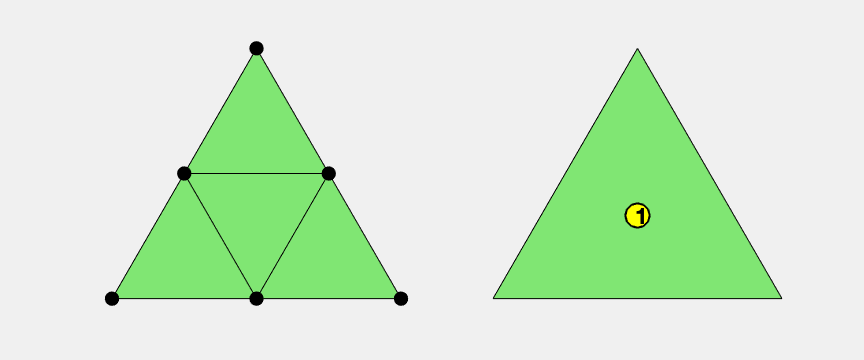

In [3]:
imatlab_export_fig('print-png')  % Static png figures.
node = [0,0; 1,0; 0.5, sqrt(3)/2];
elem = [1, 2, 3];
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.3,0.2]);
subplot(1,2,2); showmesh(node,elem); findelem(node,elem);
[node,elem] = uniformrefine(node,elem);
subplot(1,2,1); showmesh(node,elem); findnode(node,'all','noindex');

## Dirichlet boundary condition

In [4]:
%% Setting
% mesh
[node,elem] = squaremesh([0,1,0,1],0.25);
[node,elem] = uniformrefine(node,elem);
bdFlag = setboundary(node,elem,'Dirichlet');
mesh = struct('node',node,'elem',elem,'bdFlag',bdFlag);
% pde
pde = Stokesdata1; 
% options
option.L0 = 0;
option.maxIt = 4;
option.printlevel = 1;
option.solver = 'mg';

#dof:   2434,  #nnz:  16930, level:  3  MG WCYCLE iter: 13,  err = 4.5294e-09,  time = 0.13 s
#dof:   9986,  #nnz:  70690, level:  4  MG WCYCLE iter: 13,  err = 8.1896e-09,  time = 0.22 s
#dof:  40450,  #nnz: 288802, level:  5  MG WCYCLE iter: 14,  err = 3.0308e-09,  time =  1.1 s
#dof: 162818,  #nnz: 1167394, level:  6  MG WCYCLE iter: 14,  err = 3.4657e-09,  time =  4.9 s
Table: Error
 #Dof        h      |u_I-u_h|_1    ||u-u_h||   ||u_I-u_h||_{max}

  2690   6.25e-02   6.25359e-01   1.17716e-02   3.30491e-02
 10498   3.12e-02   3.19111e-01   3.05876e-03   8.93540e-03
 41474   1.56e-02   1.61122e-01   7.78951e-04   2.34901e-03
164866   7.81e-03   8.09430e-02   1.96476e-04   6.08646e-04

 #Dof        h      ||p_I-p_h||    ||p-p_h||   

  2690   6.25e-02   2.95825e-01   7.56862e-01
 10498   3.12e-02   1.43194e-01   3.76809e-01
 41474   1.56e-02   7.05586e-02   1.88036e-01
164866   7.81e-03   3.50719e-02   9.39433e-02

Table: CPU time
 #Dof    Assemble     Solve      Error      Mesh    


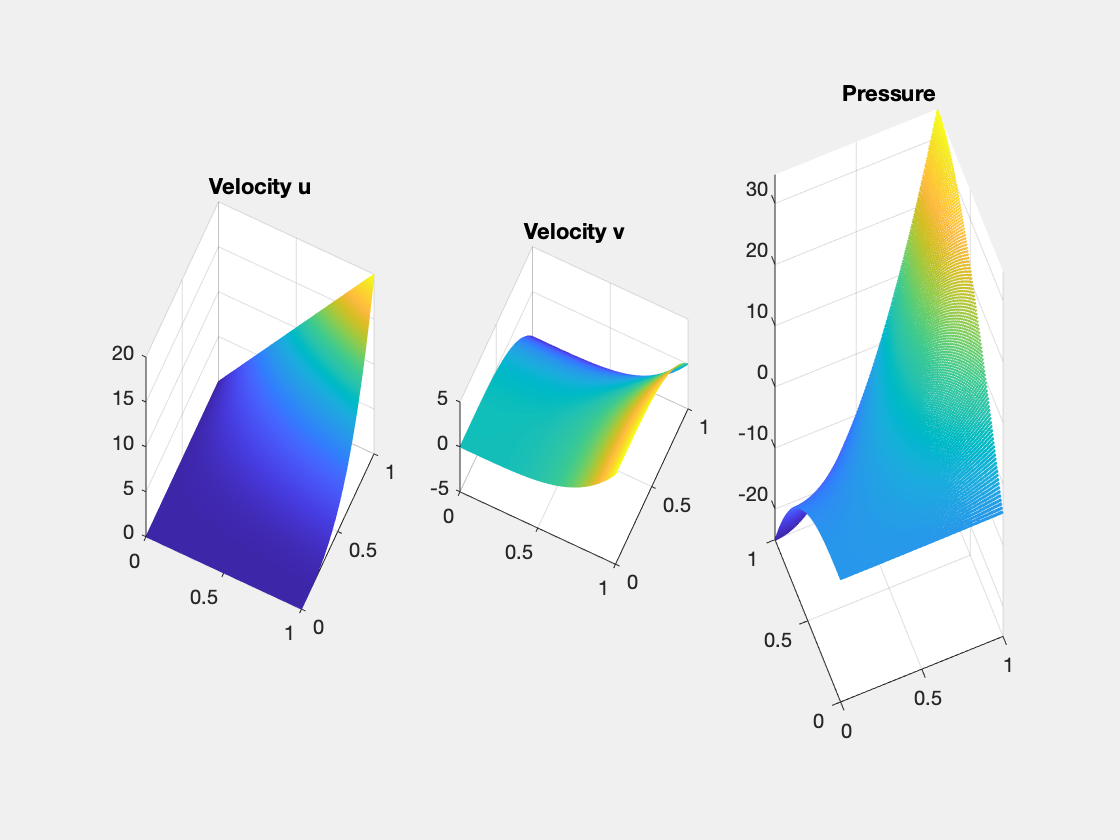

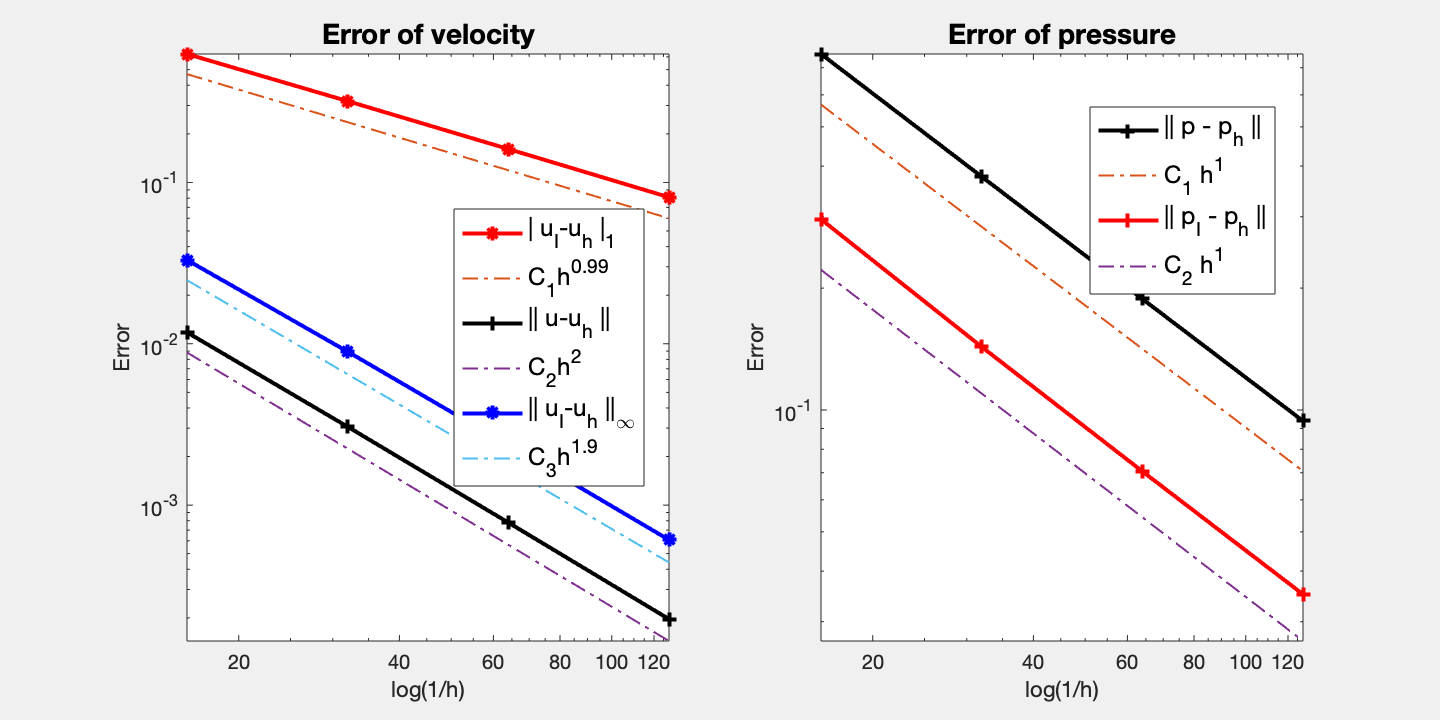

In [5]:
option.elemType = 'isoP2P0';
femStokes(mesh,pde,option);

## Conclusion

Optimal order convergence of velocity and pressure is observed. First order for velocity in H1 norm and for pressure in L2 norm. Second order for velocity in L2 and maximum norm.

Multigrid solver based on DGS smoother converges uniformly. 

To-Do: test other boundary conditions.